# Description

TBD.....

# Load Libraries

## Visualization / Heatmap Libraries

In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Dataframe and Math Function Libraries

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

# Load Data And Explore

## Google Download (eventually API)

https://takeout.google.com/

## Import

In [10]:
import os
filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\2020-09-30 Daily Summaries.csv'
df_fit = pd.read_csv(filePath)
#df_fit.tail()

In [11]:
#df_fit.head()

In [12]:
#df_fit.info()

In [13]:
#df_fit.describe()

In [14]:
#df_fit.describe(include='object')

# Shared Functions

## Correlation

In [15]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [16]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened


In [17]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

## Basic

In [18]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [19]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

# Data Clean and Prep

In [20]:
df_fit.dropna(axis=1, how='all', inplace=True)

## Google Specific

In [21]:
df_fit.set_index('Date')

,Calories (kcal),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Blood glucose specimen source,Step count,...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,2664.924490,40.718573,-74.003694,40.746357,-73.975528,8.320501,13.6,3.8,Interstitial fluid,14274.0,...,NaN,NaN,13200000.0,NaN,NaN,NaN,8340000.0,4620000.0,NaN,NaN
2020-09-27,2552.346827,40.743247,-73.976042,40.743247,-73.976042,9.064210,16.9,4.9,Interstitial fluid,5089.0,...,2488820.0,NaN,1080000.0,NaN,NaN,NaN,19680000.0,7080000.0,960000.0,NaN
2020-09-28,2449.524171,40.741972,-73.976764,40.743270,-73.975088,7.294441,14.4,3.4,Interstitial fluid,6542.0,...,NaN,NaN,11340000.0,NaN,NaN,NaN,7440000.0,4800000.0,1140000.0,NaN


## Set Aggregate Values

In [22]:
df_fit['SleepSum'] = df_fit['Deep sleeping duration (ms)'] + df_fit['Light sleeping duration (ms)'] + df_fit['Sleep duration (ms)']
df_fit['sleepSumHours'] = df_fit['SleepSum'] / 3600000

In [23]:
df_fit['basketballMinutes'] = df_fit['Basketball duration (ms)'] / 60000
df_fit['rowingMachineMinutes'] = df_fit['Rowing machine duration (ms)']/ 60000

## Lag/Shift Values

In [24]:
df_fit['rowingMachineMinutesShifted'] = df_fit['rowingMachineMinutes'].shift()
df_fit['moveMinutesCountShifted'] = df_fit['Move Minutes count'].shift()
df_fit['heartPointsShifted'] = df_fit['Heart Points'].shift()
df_fit['distanceShifted'] = df_fit['Distance (m)'].shift()
df_fit['basketballMinutesShifted'] = df_fit['basketballMinutes'].shift()


In [25]:
df_fit.columns

Index(['Date', 'Calories (kcal)', 'Low latitude (deg)', 'Low longitude (deg)',
       'High latitude (deg)', 'High longitude (deg)',
       'Average blood glucose (mmol/L)', 'Max blood glucose (mmol/L)',
       'Min blood glucose (mmol/L)', 'Blood glucose specimen source',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Heart Points', 'Heart Minutes',
       'Average heart rate (bpm)', 'Max heart rate (bpm)',
       'Min heart rate (bpm)', 'Distance (m)', 'Average speed (m/s)',
       'Max speed (m/s)', 'Min speed (m/s)',
       'Average systolic blood pressure (mmHg)',
       'Max systolic blood pressure (mmHg)',
       'Min systolic blood pressure (mmHg)',
       'Average diastolic blood pressure (mmHg)',
       'Max diastolic blood pressure (mmHg)',
       'Min diastolic blood pressure (mmHg)', 'Move Minutes count',
       'Biking duration (ms)', 'Inactive duration (ms)',
       'Unknown duration (ms)', 'Walking duration (ms)',
       'Runni

# Create Correlation Heat Map and List

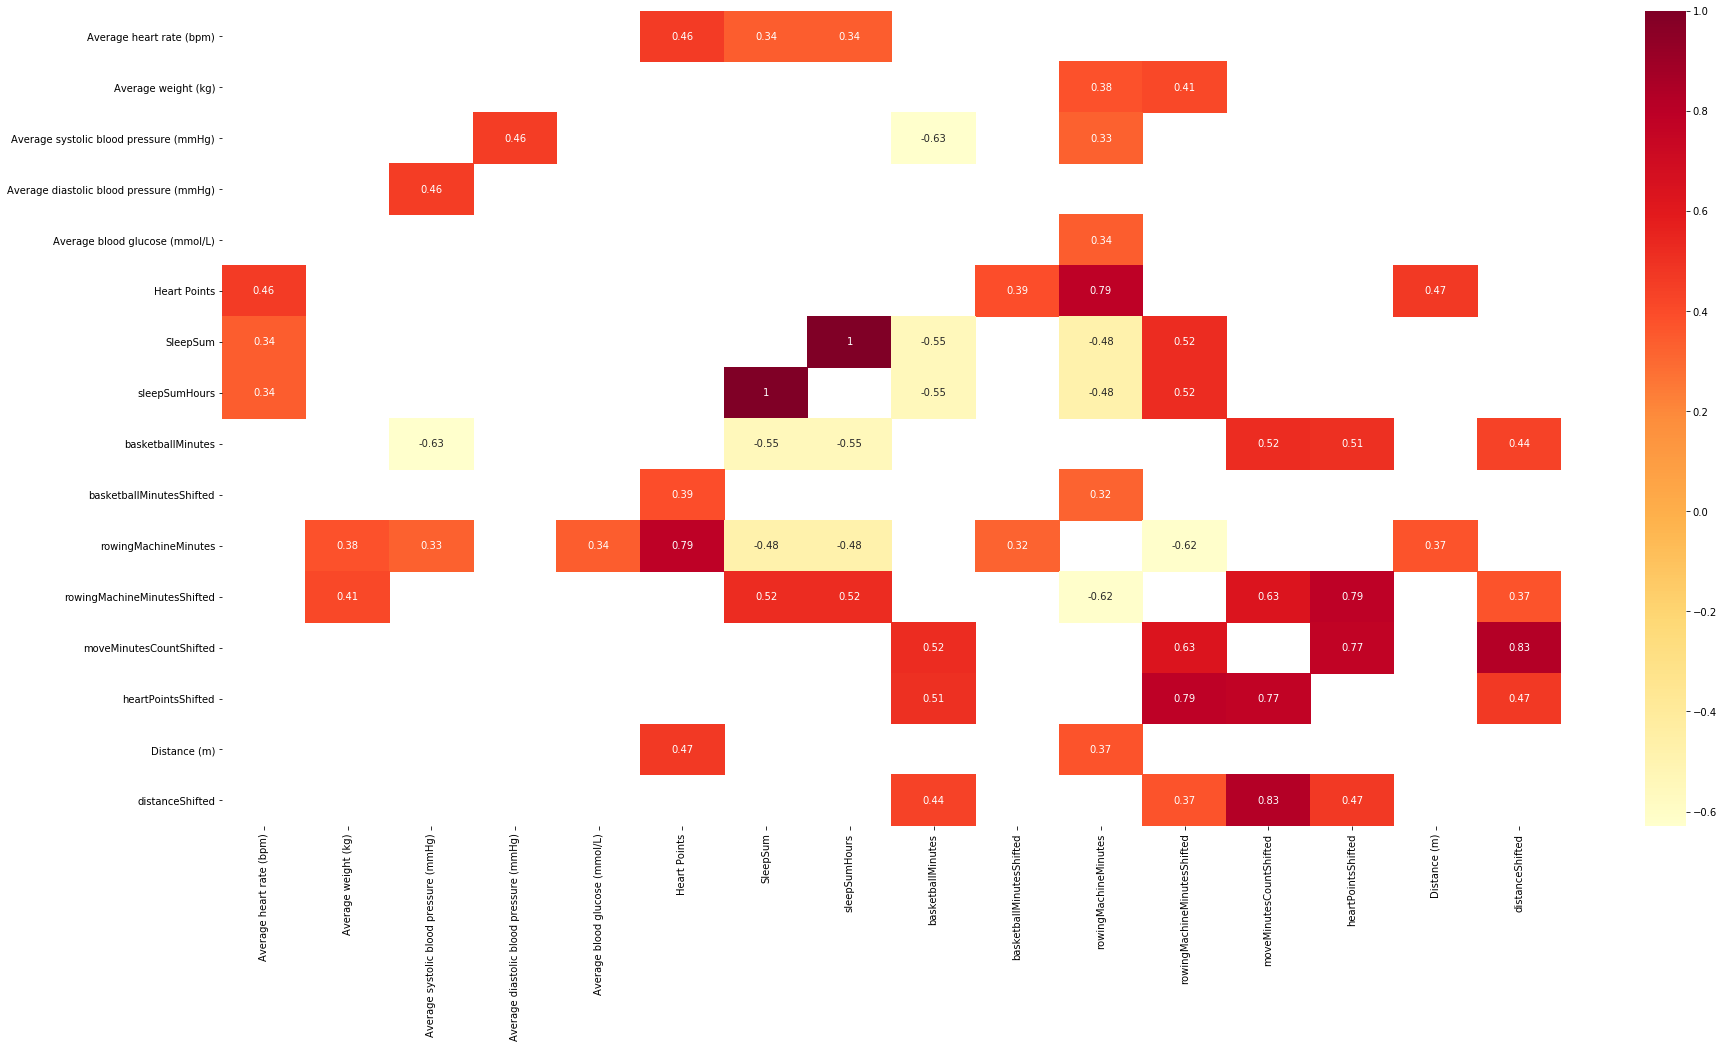

In [74]:
#set data set for analysis
df = df_fit[['Date', 'Average heart rate (bpm)','Average weight (kg)','Average systolic blood pressure (mmHg)','Average diastolic blood pressure (mmHg)','Average blood glucose (mmol/L)','Heart Points','SleepSum', 'sleepSumHours','basketballMinutes', 'basketballMinutesShifted', 'rowingMachineMinutes','rowingMachineMinutesShifted', 'moveMinutesCountShifted','heartPointsShifted','Distance (m)', 'distanceShifted']]
filterValue = 0.3
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [75]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

basketballMinutes                       Average systolic blood pressure (mmHg)    -0.628664
rowingMachineMinutes                    rowingMachineMinutesShifted               -0.620488
basketballMinutes                       sleepSumHours                             -0.546232
                                        SleepSum                                  -0.546232
rowingMachineMinutes                    sleepSumHours                             -0.479314
SleepSum                                rowingMachineMinutes                      -0.479314
basketballMinutesShifted                rowingMachineMinutes                       0.321718
rowingMachineMinutes                    Average systolic blood pressure (mmHg)     0.331505
                                        Average blood glucose (mmol/L)             0.338730
SleepSum                                Average heart rate (bpm)                   0.341093
sleepSumHours                           Average heart rate (bpm)                

# Measures

## Blood Pressure


In [76]:
filterForLabels(corr_fit_filtered, 'Average systolic blood pressure (mmHg)')

,Corr
Average diastolic blood pressure (mmHg),0.457973
basketballMinutes,-0.628664
rowingMachineMinutes,0.331505


In [77]:
filterForLabels(corr_fit_filtered, 'Average diastolic blood pressure (mmHg)')

,Corr
Average systolic blood pressure (mmHg),0.457973


In [78]:
dia = df['Average diastolic blood pressure (mmHg)']
sys = df['Average systolic blood pressure (mmHg)']
print('BP (avg):', AverageFunction(sys,1), '/', AverageFunction(dia,1))
print('BP (median):',MedianFunction(sys,1), '/', MedianFunction(dia,1))

BP (avg): 124.4 / 80.2
BP (median): 124.0 / 80.0


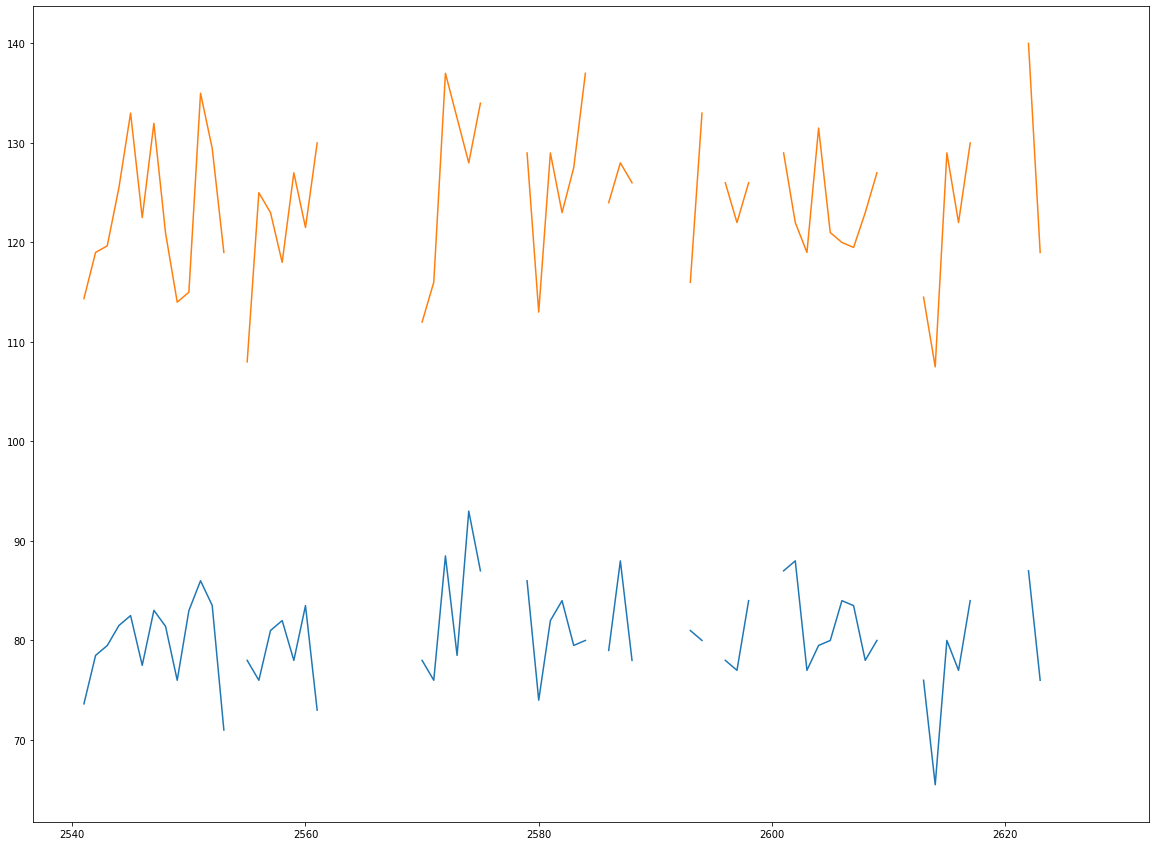

In [79]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.xlabel = 'None'
plt.show()


(115, 142.80297438271904)

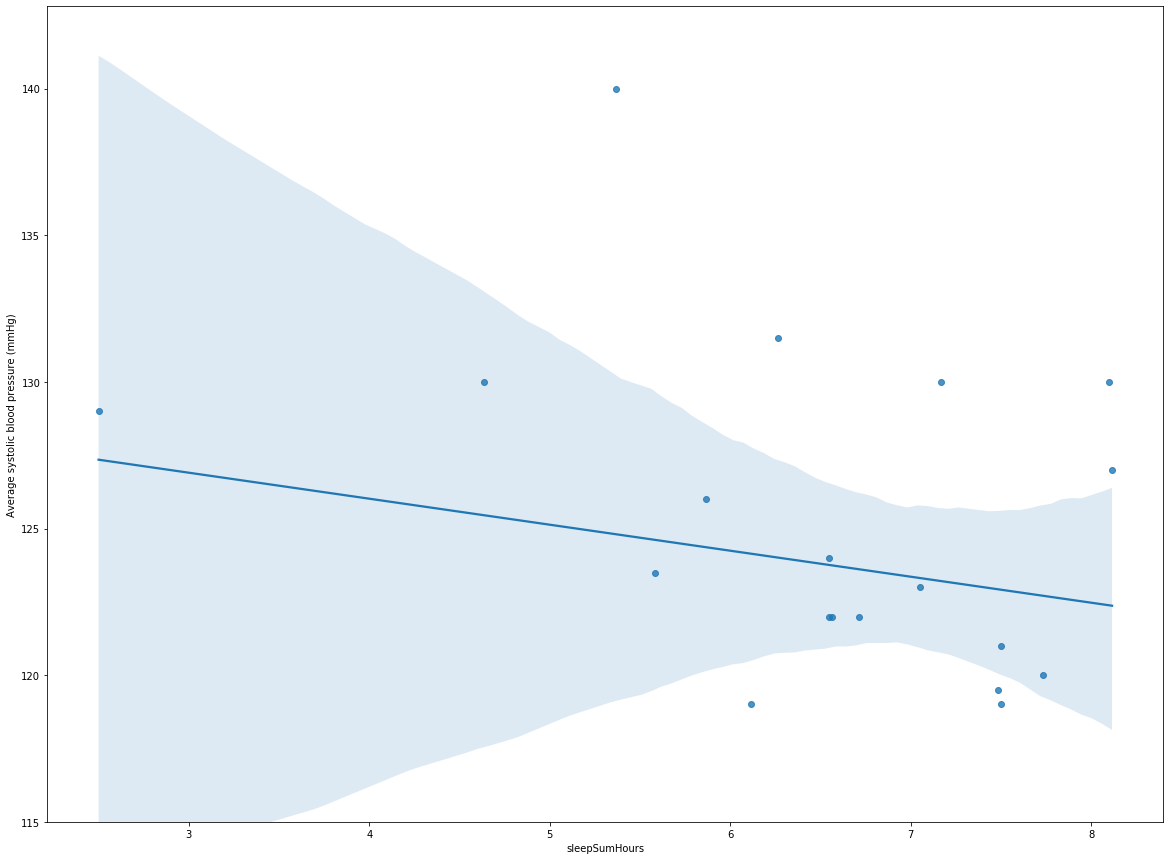

In [80]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(115,)

(100, 141.62945180279618)

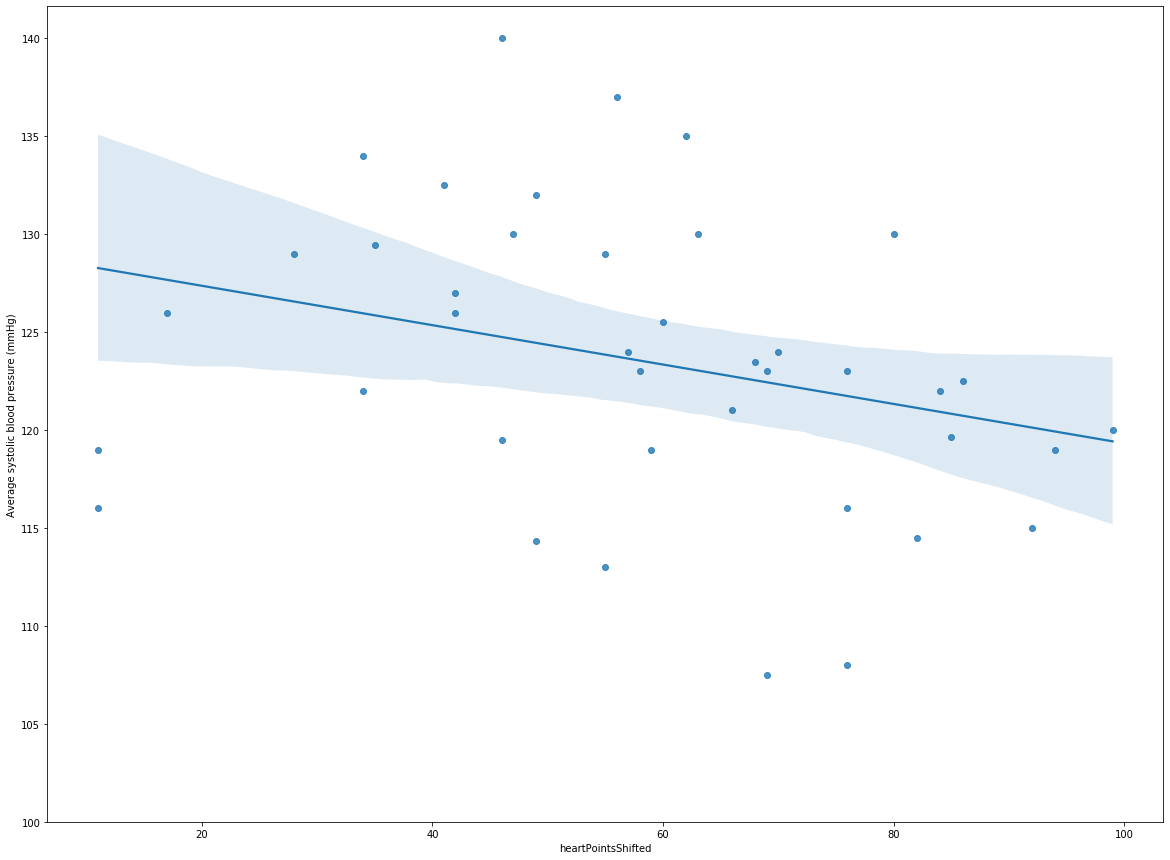

In [81]:
plt.figure(figsize=(20,15))
sns.regplot(x='heartPointsShifted', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(100,)

## Heart Rate

In [82]:
filterForLabels(corr_fit_filtered, 'Average heart rate (bpm)')

,Corr
Heart Points,0.461673
Average heart rate (bpm),0.000000
SleepSum,0.341093
sleepSumHours,0.341093


## Glucose

In [83]:
filterForLabels(corr_fit_filtered, 'Average blood glucose (mmol/L)')

,Corr
rowingMachineMinutes,0.33873


In [84]:
bg = df['Average blood glucose (mmol/L)']
print('BG (mmol/L):', AverageFunction(bg, 1))
print('BG (mmg/dl):', round(AverageFunction(bg, 1) * 18))

BG (mmol/L): 7.6
BG (mmg/dl): 137


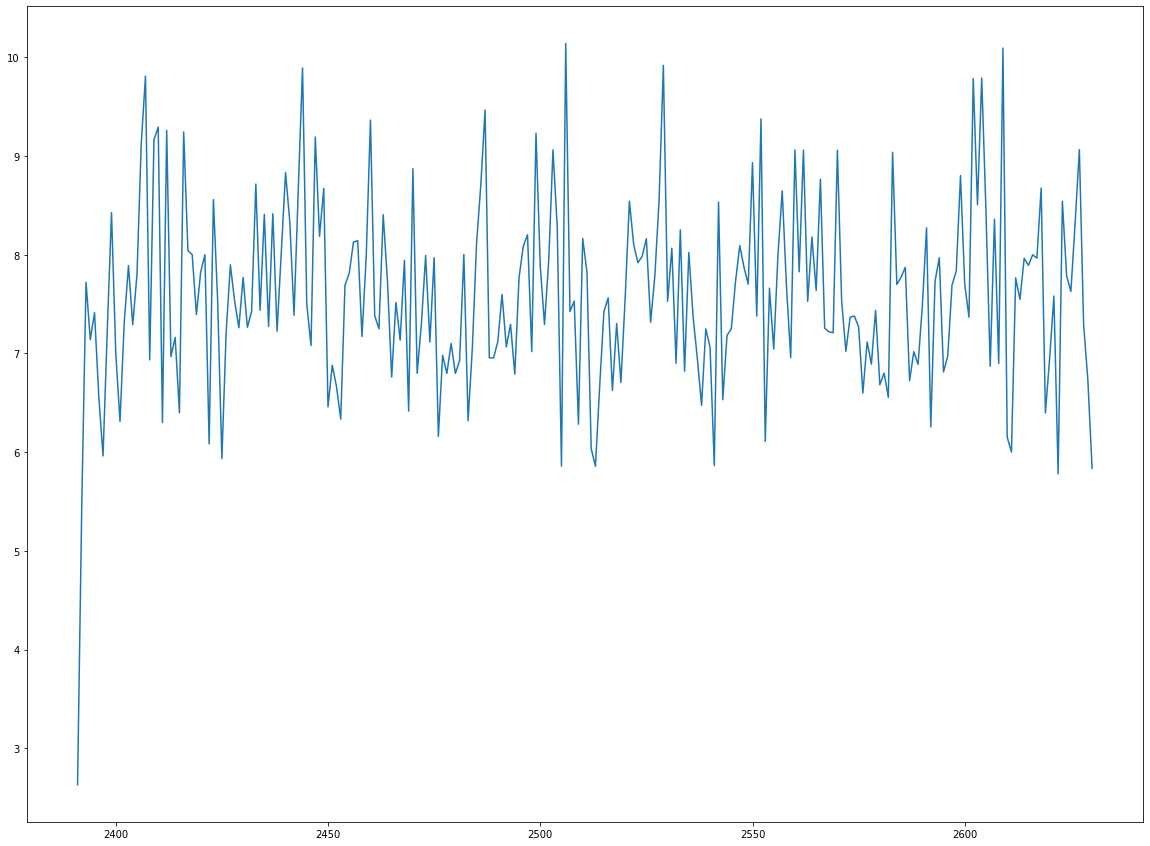

In [85]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average blood glucose (mmol/L)'])
plt.show()

## Weight

In [86]:
filterForLabels(corr_fit_filtered, 'Average weight (kg)')

,Corr
rowingMachineMinutes,0.381139
rowingMachineMinutesShifted,0.412896


In [87]:
w = df['Average weight (kg)']
print('Weight (kg):', AverageFunction(w, 1))
print('Weight (lbs):', round(AverageFunction(w, 1) * 2.2,1))


Weight (kg): 101.2
Weight (lbs): 222.6


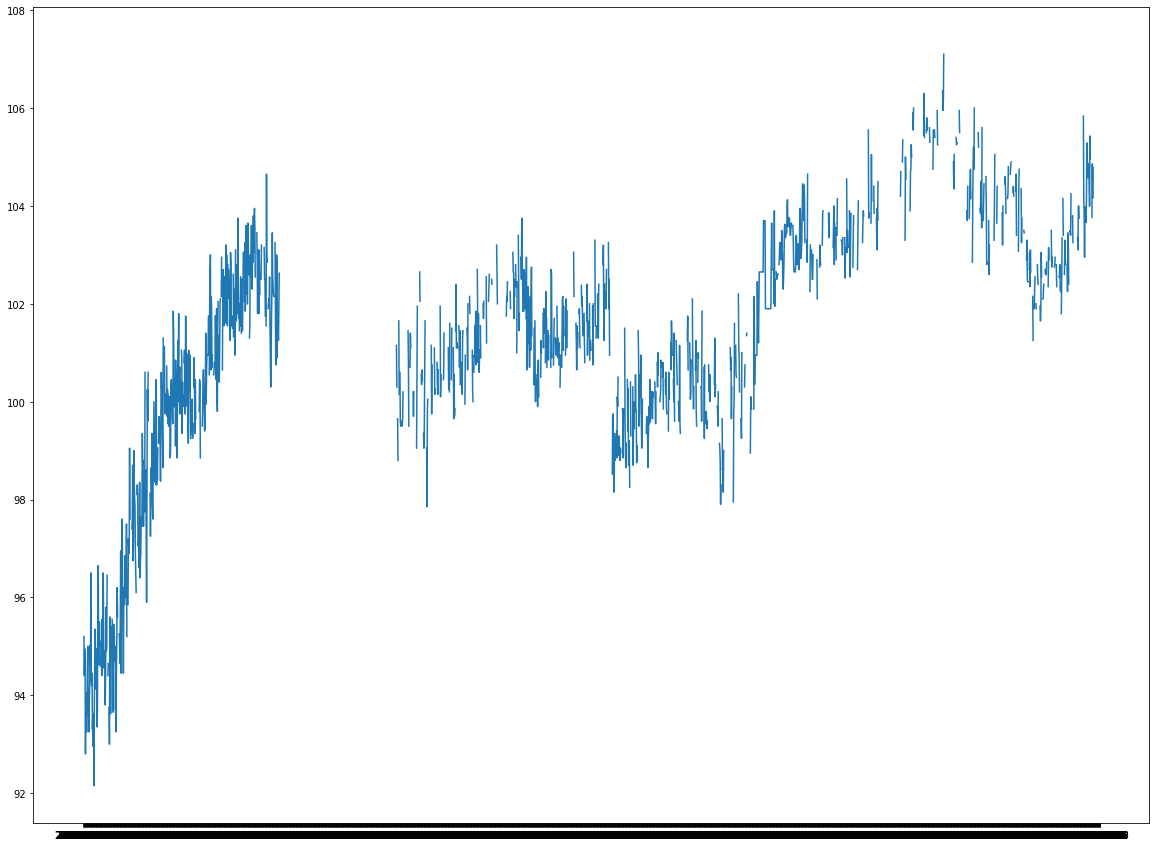

In [88]:
plt.figure(figsize=(20,15))
plt.plot(df['Date'], df['Average weight (kg)'])
plt.show()

## Sleep

In [89]:
filterForLabels(corr_fit_filtered, 'sleepSumHours')

,Corr
Average heart rate (bpm),0.341093
rowingMachineMinutesShifted,0.521396
basketballMinutes,-0.546232
rowingMachineMinutes,-0.479314
SleepSum,1.000000


In [90]:
print('Sleep:', AverageFunction(df['sleepSumHours'],2))
print('Sleep (Median):', MedianFunction(df['sleepSumHours'], 2))

Sleep: 6.49
Sleep (Median): 6.71


(115, 141.86762824503708)

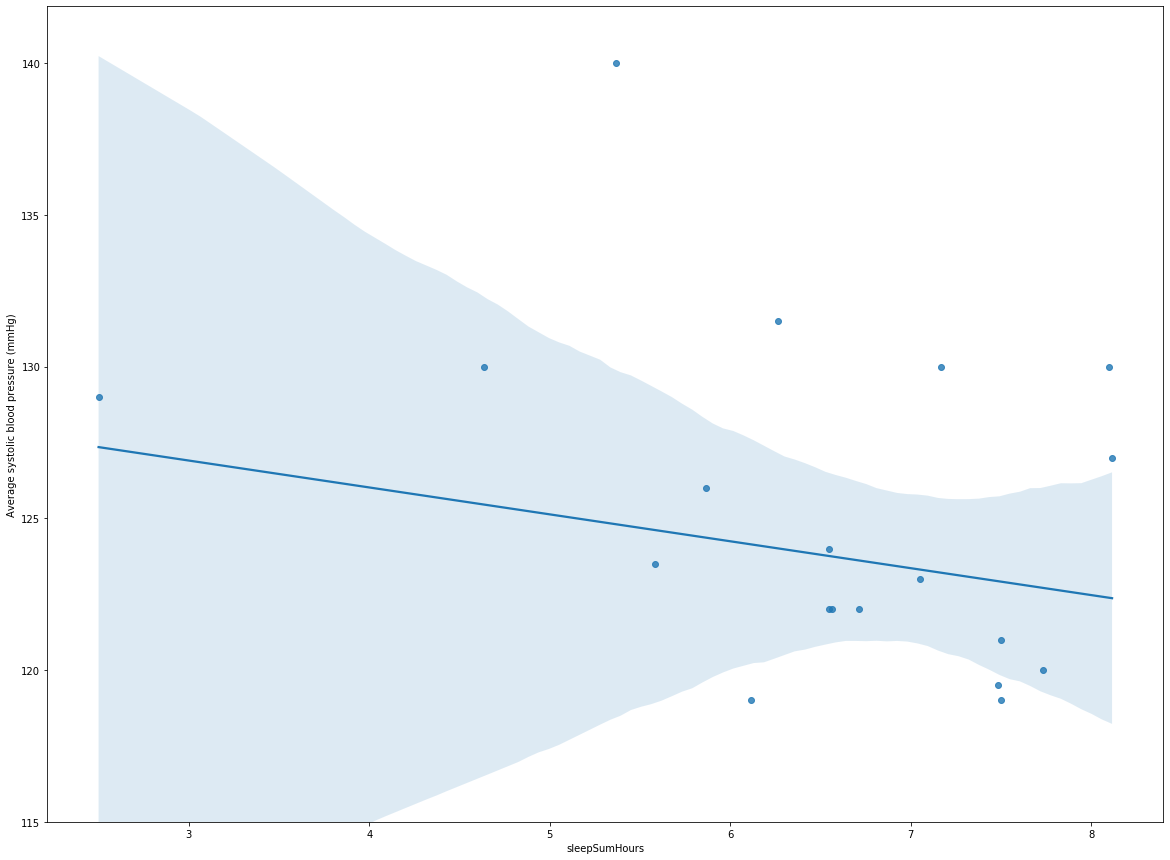

In [91]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(115,)

(10, 49.64436704134945)

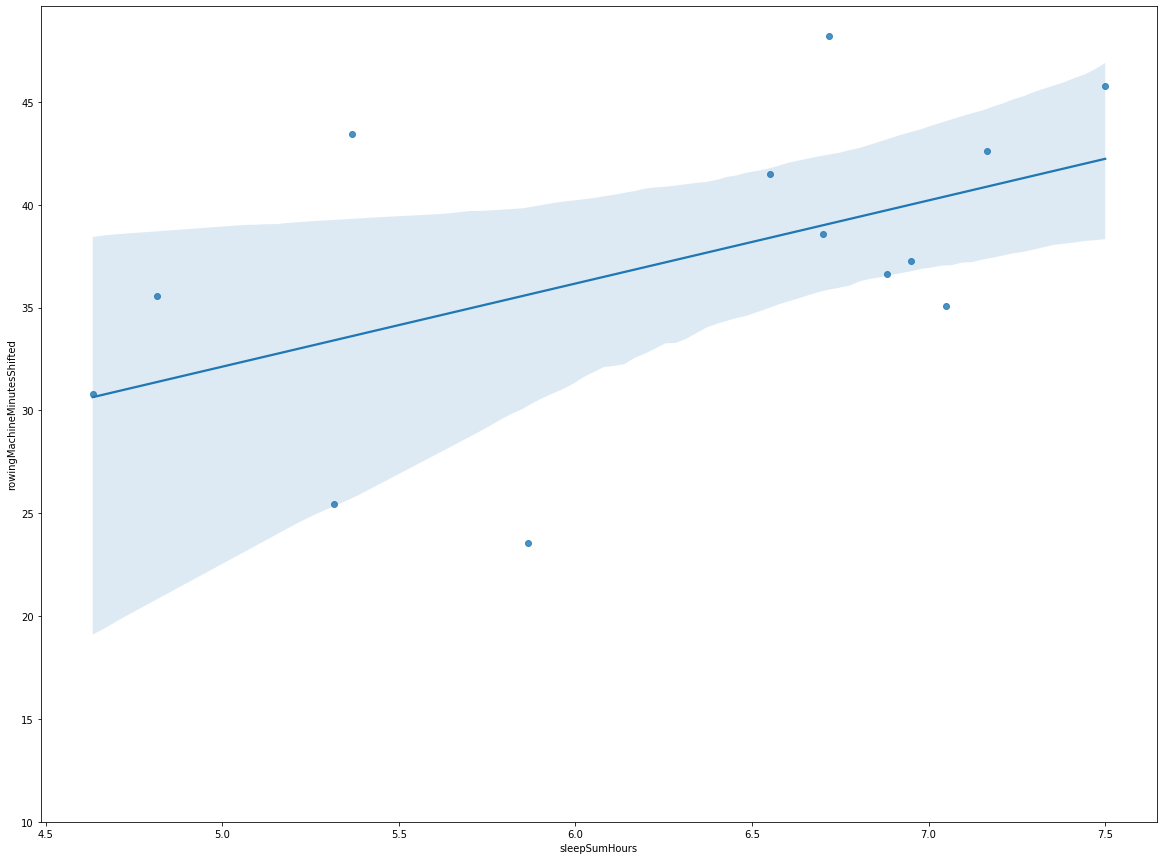

In [92]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='rowingMachineMinutesShifted', data=df)
plt.ylim(10,)

(15, 72.8529970626036)

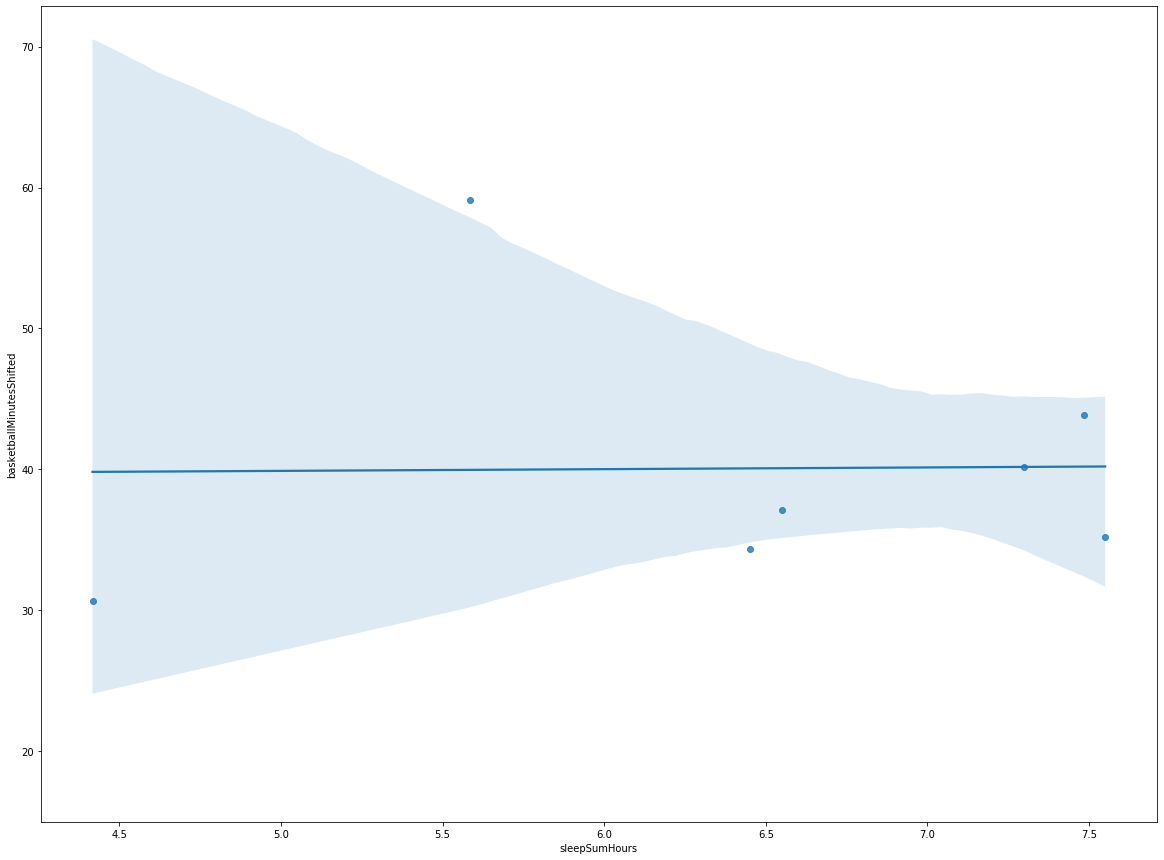

In [93]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='basketballMinutesShifted', data=df)
plt.ylim(15,)

## Activity

In [94]:
filterForLabels(corr_fit_filtered, 'distanceShifted')

,Corr
heartPointsShifted,0.470048
basketballMinutes,0.437404
moveMinutesCountShifted,0.826480


In [95]:
filterForLabels(corr_fit_filtered, 'rowingMachineMinutesShifted')

,Corr
Average weight (kg),0.412896
rowingMachineMinutes,-0.620488
sleepSumHours,0.521396
moveMinutesCountShifted,0.634222


In [96]:
filterForLabels(corr_fit_filtered, 'basketballMinutesShifted')

,Corr
rowingMachineMinutes,0.321718
Heart Points,0.390390
